In [5]:
import pandas as pd

### Importing Dataset

In [144]:
dataset = pd.read_csv('TikTok - Posts.csv')

In [146]:
dataset.head()

,url,post_id,description,create_time,digg_count,share_count,collect_count,comment_count,play_count,video_duration,...,music,cdn_url,is_verified,account_id,carousel_images,tagged_user,profile_followers,tt_chain_token,region,commerce_info
0,https://www.tiktok.com/@callmeadal/video/74640...,7464050127636925742,Replying to @yup Day 424 of me doing the LWYMM...,2025-01-26T02:47:13.000Z,94,1.0,3,11,588,73,...,"{""authorname"":""CallMeADAL"",""covermedium"":""http...",https://v16-webapp-prime.tiktok.com/video/tos/...,False,callmeadal,NaN,"[{""user_handle"":""canwehaveamulligan"",""user_id""...",47600,Oo8ie2lVVc7zvUjYELk2wQ==,US,San Antonio
1,https://www.tiktok.com/@treehuggerclothpads/vi...,7463982315656482053,#duet with @Cams Favs #womenshealth reusable c...,2025-01-25T22:23:34.000Z,99,NaN,1,1,1011,10,...,"{""authorname"":""Cams Favs"",""covermedium"":""https...",https://v16-webapp-prime.tiktok.com/video/tos/...,False,treehuggerclothpads,NaN,"[{""user_handle"":null,""user_id"":null,""user_name...",72200,gLWvEpRssJyyQk90bMsISQ==,CA,NaN
2,https://www.tiktok.com/@qualityportroofing/vid...,7258275403557555461,Roofing sheet in Nigeria installation..#roofin...,2023-07-21T14:15:36.000Z,59,10.0,12,10,8115,20,...,"{""authorname"":""qualityportroofing"",""covermediu...",https://v16-webapp-prime.tiktok.com/video/tos/...,False,qualityportroofing,NaN,NaN,297,4gjObiT1TcENBUusd2dXew==,NG,NaN
3,https://www.tiktok.com/@michansari/video/74439...,7443908704291818795,happy monday guys <33 #grwm #makeup,2024-12-02T20:07:40.000Z,374800,4391.0,41612,514,3400000,19,...,"{""authorname"":""Lana Del Rey"",""covermedium"":""ht...",https://v16-webapp-prime.tiktok.com/video/tos/...,False,michansari,NaN,NaN,94800,ERdHOeuj+513OQwvBTi77Q==,US,NaN
4,https://www.tiktok.com/@primevideonl/video/744...,7446806901532249377,MONEYFESTEN. The grind never stops. DaanCoin l...,2024-12-10T15:34:12.000Z,15500,344.0,1293,118,701100,12,...,"{""authorname"":""PrimeVideoNL"",""covermedium"":""ht...",https://v16-webapp-prime.tiktok.com/video/tos/...,True,primevideonl,NaN,"[{""user_handle"":null,""user_id"":null,""user_name...",613100,LYL7wJiuUY87Q8wVogNXTg==,NL,NaN


In [10]:
dataset.rename(columns={
    "play_count": "views",
    "digg_count": "likes",
    "collect_count": "saves",
    "comment_count": "comments",
    "share_count": "shares"
}, inplace=True)

In [11]:
print(dataset.shape)

(1000, 37)


In [12]:
column_names = list(dataset.columns)
print(column_names)

['url', 'post_id', 'description', 'create_time', 'likes', 'shares', 'saves', 'comments', 'views', 'video_duration', 'hashtags', 'original_sound', 'profile_id', 'profile_username', 'profile_url', 'profile_avatar', 'profile_biography', 'preview_image', 'post_type', 'discovery_input', 'offical_item', 'secu_id', 'original_item', 'shortcode', 'width', 'ratio', 'video_url', 'music', 'cdn_url', 'is_verified', 'account_id', 'carousel_images', 'tagged_user', 'profile_followers', 'tt_chain_token', 'region', 'commerce_info']


### Seperating the dataset into two datasets with the needed columns

In [17]:
engagement_data = dataset[["views", "likes", "comments", "shares", "saves"]]
video_data = dataset[["create_time", "video_duration", "hashtags"]]

In [19]:
engagement_data.head()

,views,likes,comments,shares,saves
0,588,94,11,1.0,3
1,1011,99,1,NaN,1
2,8115,59,10,10.0,12
3,3400000,374800,514,4391.0,41612
4,701100,15500,118,344.0,1293


In [21]:
video_data.head()

,create_time,video_duration,hashtags
0,2025-01-26T02:47:13.000Z,73,"[""swifttok"",""reputationtvcountdown"",""reputatio..."
1,2025-01-25T22:23:34.000Z,10,"[""duet"",""womenshealth""]"
2,2023-07-21T14:15:36.000Z,20,"[""roofinglife"",""nigeria"",""roofing"",""stonecoated""]"
3,2024-12-02T20:07:40.000Z,19,"[""grwm"",""makeup""]"
4,2024-12-10T15:34:12.000Z,12,"[""detattas"",""detattasdeserie"",""moneyfesting"",""..."


### Seperating the create time column into date and time

In [24]:
dataset["create_time"] = pd.to_datetime(dataset["create_time"]) 

In [26]:
dataset["date"] = dataset["create_time"].dt.date  
dataset["time"] = dataset["create_time"].dt.time   

In [28]:
dataset["date"].head()

0    2025-01-26
1    2025-01-25
2    2023-07-21
3    2024-12-02
4    2024-12-10
Name: date, dtype: object

In [30]:
dataset["time"].head()

0    02:47:13
1    22:23:34
2    14:15:36
3    20:07:40
4    15:34:12
Name: time, dtype: object

### Remaking the video data dataset

In [33]:
video_data = dataset[["date", "time", "video_duration", "hashtags"]]

In [35]:
video_data

,date,time,video_duration,hashtags
0,2025-01-26,02:47:13,73,"[""swifttok"",""reputationtvcountdown"",""reputatio..."
1,2025-01-25,22:23:34,10,"[""duet"",""womenshealth""]"
2,2023-07-21,14:15:36,20,"[""roofinglife"",""nigeria"",""roofing"",""stonecoated""]"
3,2024-12-02,20:07:40,19,"[""grwm"",""makeup""]"
4,2024-12-10,15:34:12,12,"[""detattas"",""detattasdeserie"",""moneyfesting"",""..."
...,...,...,...,...
995,2025-01-25,15:18:51,8,"[""hairextensions"",""educator"",""hairextensioncou..."
996,2025-01-24,14:56:16,13,"[""satinbonnets"",""satinbonnet"",""satinbonnetfory..."
997,2023-07-09,20:58:18,34,"[""cybernews"",""iphone"",""apple"",""tech"",""cybersec..."
998,2025-01-16,09:34:05,12,"[""crossbodybag"",""shoulderbag"",""satchelbag"",""ev..."


### Analysis of video length on TikTok engagement data

In [142]:
video_length_df = dataset[["video_duration", "views", "likes", "comments", "shares", "saves"]]

In [40]:
video_length_df.corr()

,video_duration,views,likes,comments,shares,saves
video_duration,1.000000,-0.034369,-0.022446,-0.010936,-0.004058,-0.022631
views,-0.034369,1.000000,0.839909,0.757363,0.506241,0.602492
likes,-0.022446,0.839909,1.000000,0.757170,0.611004,0.738280
comments,-0.010936,0.757363,0.757170,1.000000,0.511136,0.501835
shares,-0.004058,0.506241,0.611004,0.511136,1.000000,0.601983
saves,-0.022631,0.602492,0.738280,0.501835,0.601983,1.000000


In [42]:
import matplotlib.pyplot as plt

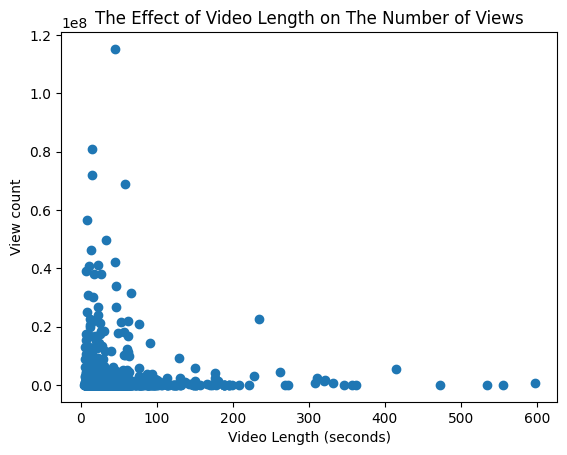

In [44]:
plt.scatter(video_length_df["video_duration"], video_length_df["views"])

plt.xlabel("Video Length (seconds)")
plt.ylabel("View count")

plt.title("The Effect of Video Length on The Number of Views")

plt.show()

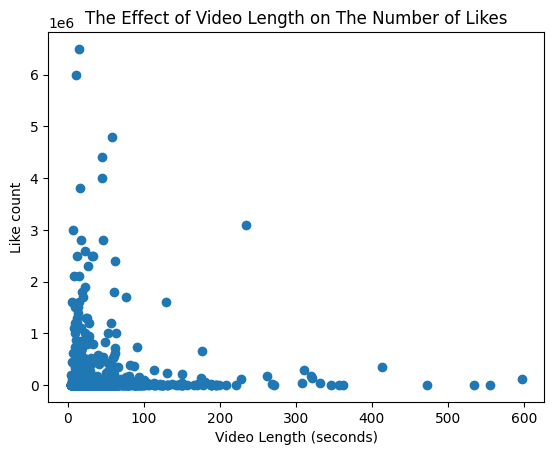

In [45]:
plt.scatter(video_length_df["video_duration"], video_length_df["likes"])

plt.xlabel("Video Length (seconds)")
plt.ylabel("Like count")

plt.title("The Effect of Video Length on The Number of Likes")

plt.show()

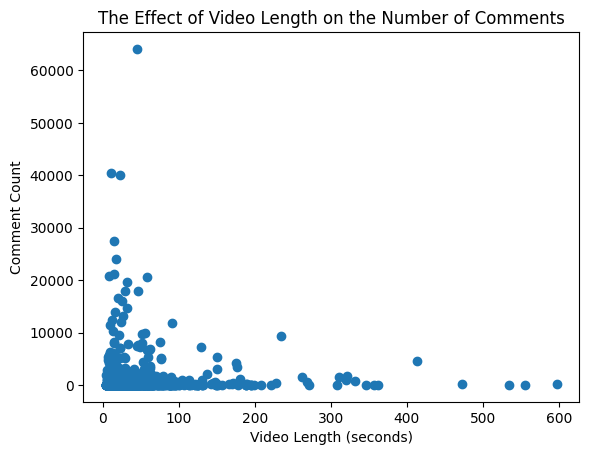

In [46]:
plt.scatter(video_length_df["video_duration"], video_length_df["comments"])

plt.xlabel("Video Length (seconds)")
plt.ylabel("Comment Count")

plt.title("The Effect of Video Length on the Number of Comments")

plt.show()

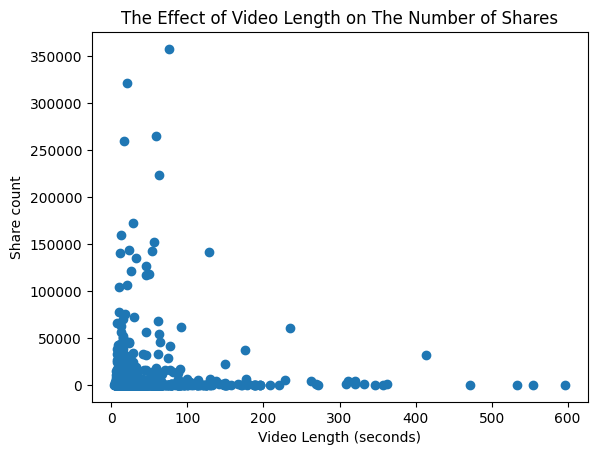

In [48]:
plt.scatter(video_length_df["video_duration"], video_length_df["shares"])

plt.xlabel("Video Length (seconds)")
plt.ylabel("Share count")

plt.title("The Effect of Video Length on The Number of Shares")

plt.show()

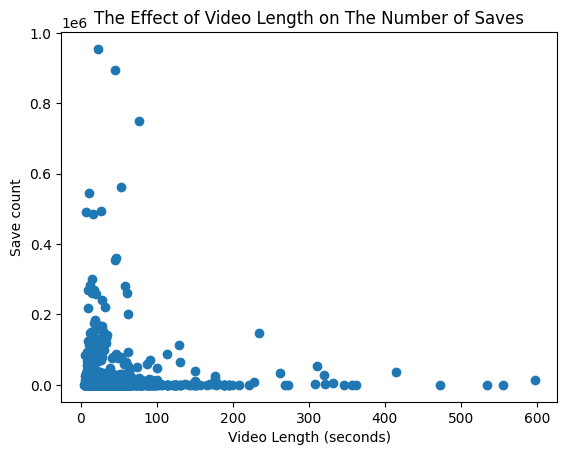

In [50]:
plt.scatter(video_length_df["video_duration"], video_length_df["saves"])

plt.xlabel("Video Length (seconds)")
plt.ylabel("Save count")

plt.title("The Effect of Video Length on The Number of Saves")

plt.show()

### ADVANCED Analysis of video length on TikTok engagement data

In [53]:
video_length_df = dataset[["video_duration", "views", "likes", "comments", "shares", "saves"]].copy()

bins = [0, 10_000, 100_000, 1_000_000, 10_000_000]
labels = ['0–10K', '10K–100K', '100K–1M', '1M–10M']

video_length_df['view_group'] = pd.cut(video_length_df['views'], bins=bins, labels=labels)

In [55]:
group_corrs = video_length_df.groupby('view_group').apply(lambda group: group.corr(numeric_only=True))

In [58]:
for group, sub_df in video_length_df.groupby('view_group'):
    corr = sub_df[['video_duration', 'views']].corr().iloc[0, 1]
    print(f"Correlation in {group}: {corr:.3f}")

Correlation in 0–10K: 0.082
Correlation in 10K–100K: 0.132
Correlation in 100K–1M: -0.048
Correlation in 1M–10M: -0.100


In [61]:
for group, sub_df in video_length_df.groupby('view_group'):
    corr = sub_df[['video_duration', 'likes']].corr().iloc[0, 1]
    print(f"Correlation in {group}: {corr:.3f}")

Correlation in 0–10K: 0.050
Correlation in 10K–100K: 0.189
Correlation in 100K–1M: 0.068
Correlation in 1M–10M: -0.082


In [63]:
for group, sub_df in video_length_df.groupby('view_group'):
    corr = sub_df[['video_duration', 'comments']].corr().iloc[0, 1]
    print(f"Correlation in {group}: {corr:.3f}")

Correlation in 0–10K: 0.171
Correlation in 10K–100K: 0.285
Correlation in 100K–1M: 0.004
Correlation in 1M–10M: 0.020


In [65]:
for group, sub_df in video_length_df.groupby('view_group'):
    corr = sub_df[['video_duration', 'shares']].corr().iloc[0, 1]
    print(f"Correlation in {group}: {corr:.3f}")

Correlation in 0–10K: 0.130
Correlation in 10K–100K: 0.029
Correlation in 100K–1M: -0.066
Correlation in 1M–10M: 0.029


In [67]:
for group, sub_df in video_length_df.groupby('view_group'):
    corr = sub_df[['video_duration', 'saves']].corr().iloc[0, 1]
    print(f"Correlation in {group}: {corr:.3f}")

Correlation in 0–10K: 0.072
Correlation in 10K–100K: -0.024
Correlation in 100K–1M: 0.019
Correlation in 1M–10M: -0.076


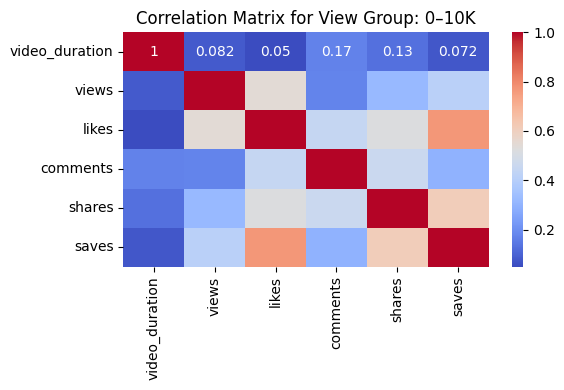

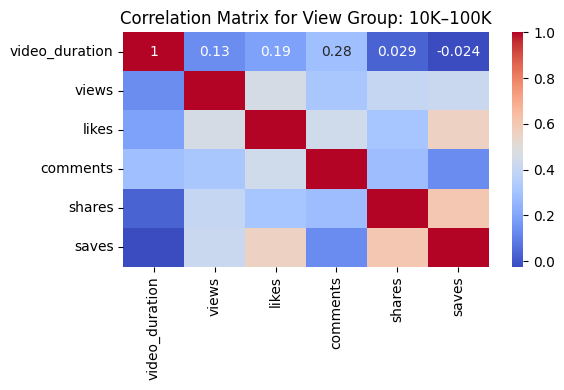

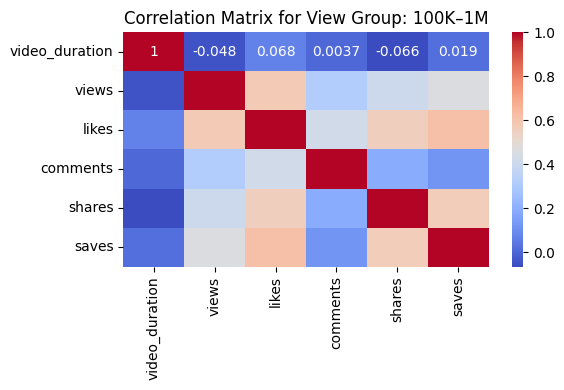

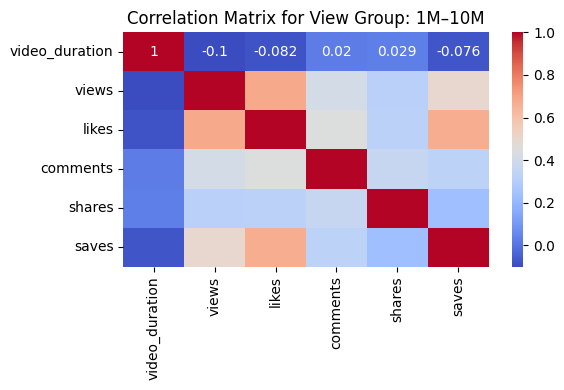

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

for group, sub_df in video_length_df.groupby('view_group'):
    plt.figure(figsize=(6, 4))
    sns.heatmap(sub_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix for View Group: {group}")
    plt.tight_layout()
    plt.show()

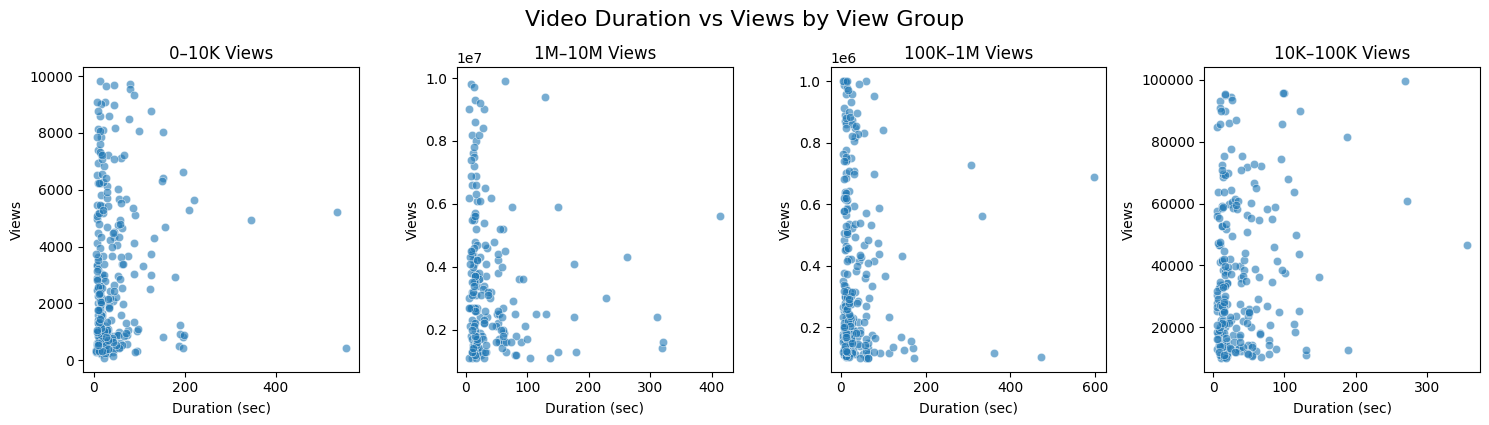

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

metric = 'views'

groups = video_length_df['view_group'].dropna().unique()

plt.figure(figsize=(15, 4))
for i, group in enumerate(groups):
    plt.subplot(1, len(groups), i + 1)
    subset = video_length_df[video_length_df['view_group'] == group]
    sns.scatterplot(data=subset, x='video_duration', y=metric, alpha=0.6)
    plt.title(f'{group} Views')
    plt.xlabel('Duration (sec)')
    plt.ylabel(metric.capitalize())
    plt.tight_layout()

plt.suptitle(f'Video Duration vs {metric.capitalize()} by View Group', fontsize=16, y=1.05)
plt.show()

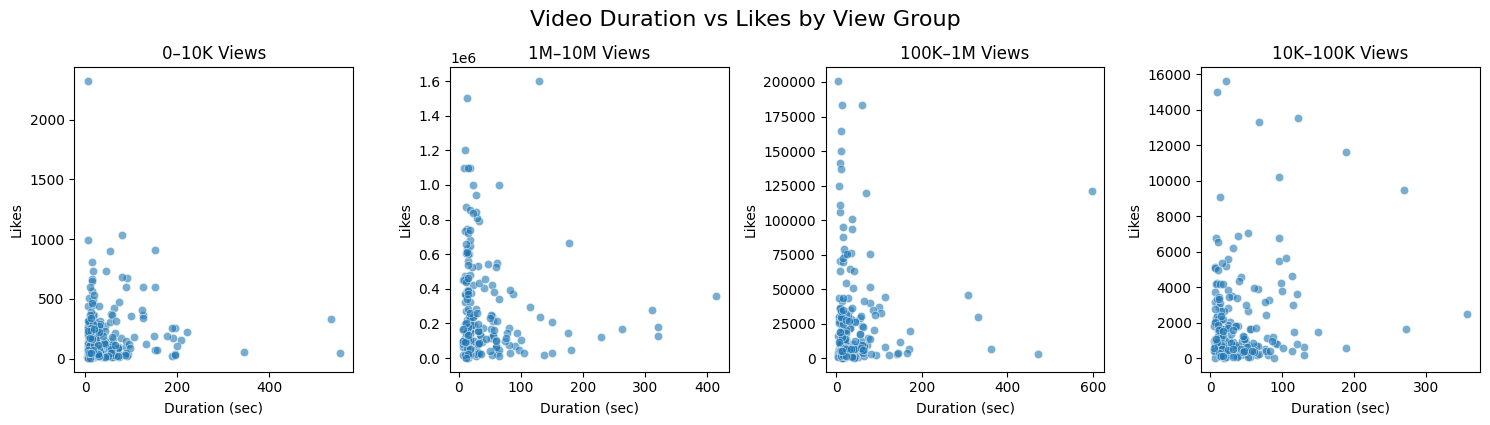

In [71]:
metric = 'likes'

groups = video_length_df['view_group'].dropna().unique()

plt.figure(figsize=(15, 4))
for i, group in enumerate(groups):
    plt.subplot(1, len(groups), i + 1)
    subset = video_length_df[video_length_df['view_group'] == group]
    sns.scatterplot(data=subset, x='video_duration', y=metric, alpha=0.6)
    plt.title(f'{group} Views')
    plt.xlabel('Duration (sec)')
    plt.ylabel(metric.capitalize())
    plt.tight_layout()

plt.suptitle(f'Video Duration vs {metric.capitalize()} by View Group', fontsize=16, y=1.05)
plt.show()

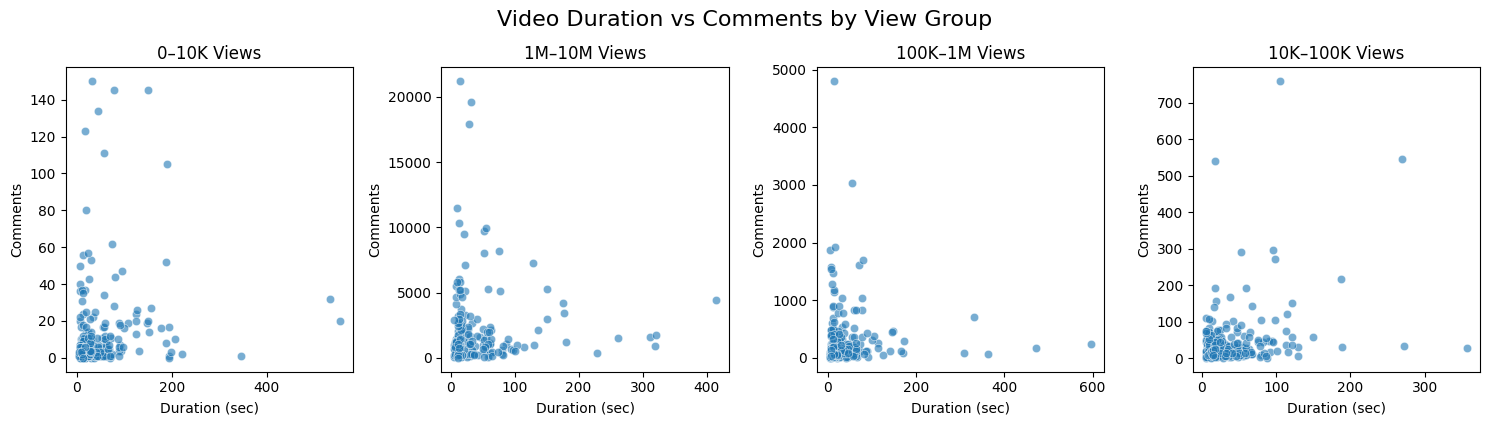

In [72]:
metric = 'comments'

groups = video_length_df['view_group'].dropna().unique()

plt.figure(figsize=(15, 4))
for i, group in enumerate(groups):
    plt.subplot(1, len(groups), i + 1)
    subset = video_length_df[video_length_df['view_group'] == group]
    sns.scatterplot(data=subset, x='video_duration', y=metric, alpha=0.6)
    plt.title(f'{group} Views')
    plt.xlabel('Duration (sec)')
    plt.ylabel(metric.capitalize())
    plt.tight_layout()

plt.suptitle(f'Video Duration vs {metric.capitalize()} by View Group', fontsize=16, y=1.05)
plt.show()

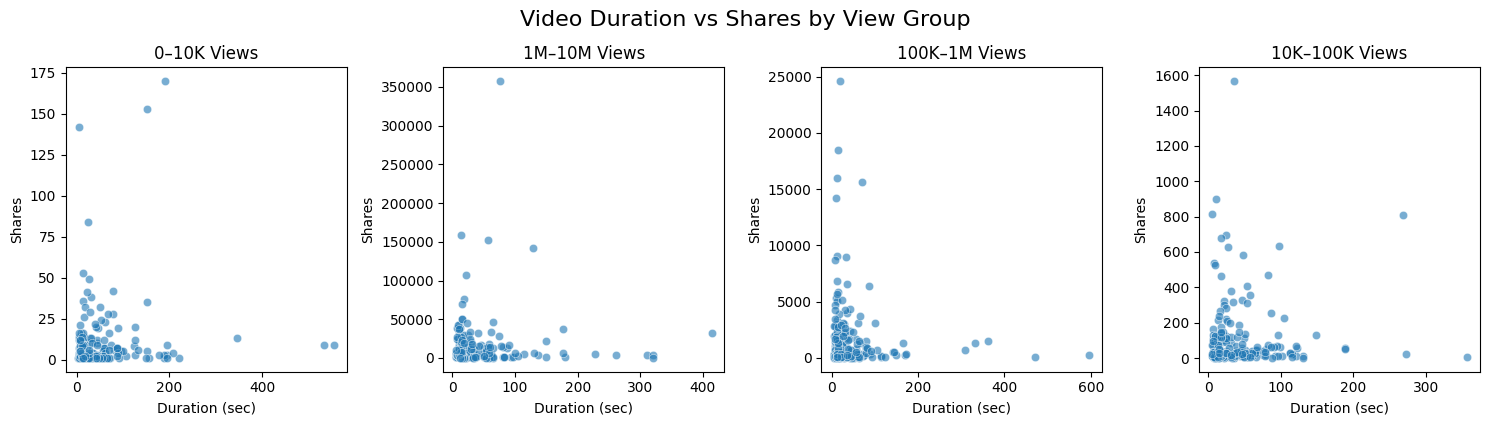

In [73]:
metric = 'shares'

groups = video_length_df['view_group'].dropna().unique()

plt.figure(figsize=(15, 4))
for i, group in enumerate(groups):
    plt.subplot(1, len(groups), i + 1)
    subset = video_length_df[video_length_df['view_group'] == group]
    sns.scatterplot(data=subset, x='video_duration', y=metric, alpha=0.6)
    plt.title(f'{group} Views')
    plt.xlabel('Duration (sec)')
    plt.ylabel(metric.capitalize())
    plt.tight_layout()

plt.suptitle(f'Video Duration vs {metric.capitalize()} by View Group', fontsize=16, y=1.05)
plt.show()

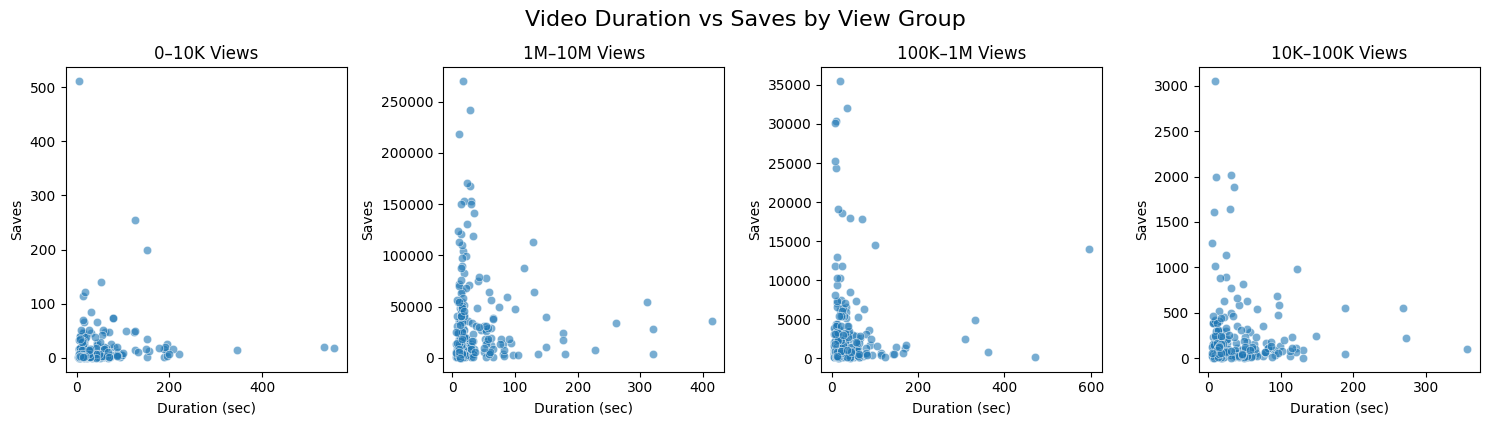

In [74]:
metric = 'saves'

groups = video_length_df['view_group'].dropna().unique()

plt.figure(figsize=(15, 4))
for i, group in enumerate(groups):
    plt.subplot(1, len(groups), i + 1)
    subset = video_length_df[video_length_df['view_group'] == group]
    sns.scatterplot(data=subset, x='video_duration', y=metric, alpha=0.6)
    plt.title(f'{group} Views')
    plt.xlabel('Duration (sec)')
    plt.ylabel(metric.capitalize())
    plt.tight_layout()

plt.suptitle(f'Video Duration vs {metric.capitalize()} by View Group', fontsize=16, y=1.05)
plt.show()

### Analysis of Time Posted on TikTok engagament data

In [76]:
time_posted_df = dataset[["time", "views", "likes", "comments", "shares", "saves"]]

In [78]:
time_posted_df.head()

,time,views,likes,comments,shares,saves
0,02:47:13,588,94,11,1.0,3
1,22:23:34,1011,99,1,NaN,1
2,14:15:36,8115,59,10,10.0,12
3,20:07:40,3400000,374800,514,4391.0,41612
4,15:34:12,701100,15500,118,344.0,1293


In [79]:
from datetime import datetime

In [80]:
time_posted_df = time_posted_df.copy()

time_posted_df['hour'] = time_posted_df['time'].apply(lambda x: x.hour)
time_posted_df['minute'] = time_posted_df['time'].apply(lambda x: x.minute)

In [81]:
time_posted_df.head()

,time,views,likes,comments,shares,saves,hour,minute
0,02:47:13,588,94,11,1.0,3,2,47
1,22:23:34,1011,99,1,NaN,1,22,23
2,14:15:36,8115,59,10,10.0,12,14,15
3,20:07:40,3400000,374800,514,4391.0,41612,20,7
4,15:34:12,701100,15500,118,344.0,1293,15,34


In [83]:
corr_matrix = time_posted_df.corr(numeric_only=True)

print(corr_matrix * 100)

               views       likes    comments      shares       saves  \
views     100.000000   83.990885   75.736269   50.624145   60.249207   
likes      83.990885  100.000000   75.716952   61.100393   73.828008   
comments   75.736269   75.716952  100.000000   51.113613   50.183496   
shares     50.624145   61.100393   51.113613  100.000000   60.198273   
saves      60.249207   73.828008   50.183496   60.198273  100.000000   
hour        0.949306    1.288045   -2.513950    0.161366    1.818661   
minute     -0.374023    2.082208   -3.558287   -0.397291    1.728656   

                hour      minute  
views       0.949306   -0.374023  
likes       1.288045    2.082208  
comments   -2.513950   -3.558287  
shares      0.161366   -0.397291  
saves       1.818661    1.728656  
hour      100.000000    2.663643  
minute      2.663643  100.000000  


In [84]:
import seaborn as sns
import numpy as np

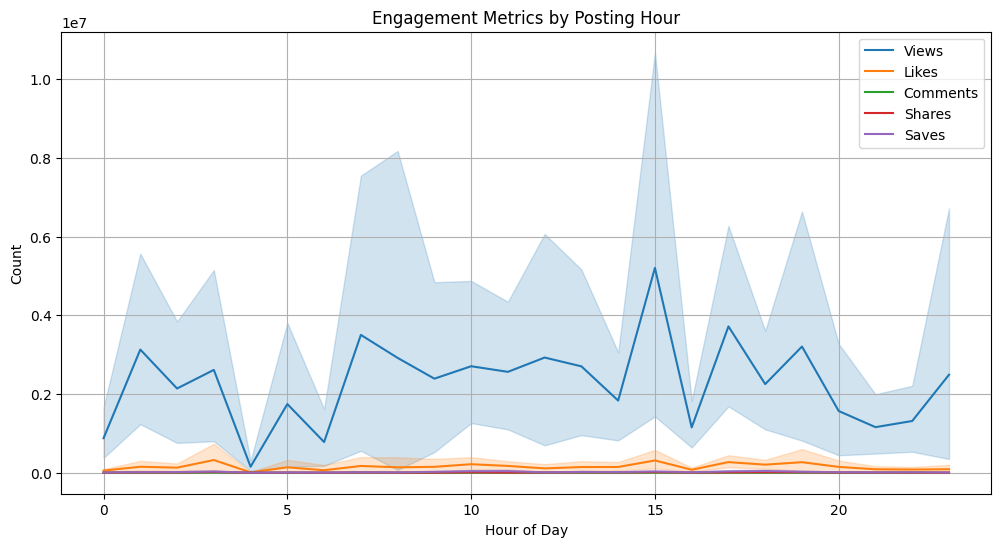

In [85]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=time_posted_df, x='hour', y='views', label='Views')
sns.lineplot(data=time_posted_df, x='hour', y='likes', label='Likes')
sns.lineplot(data=time_posted_df, x='hour', y='comments', label='Comments')
sns.lineplot(data=time_posted_df, x='hour', y='shares', label='Shares')
sns.lineplot(data=time_posted_df, x='hour', y='saves', label='Saves')

plt.title('Engagement Metrics by Posting Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()

### Advanced analysis of Time Posted on TikTok engagement data

In [87]:
bins = [0, 10_000, 100_000, 1_000_000, 10_000_000]
labels = ['0–10K', '10K–100K', '100K–1M', '1M–10M']
time_posted_df = time_posted_df.copy()
time_posted_df['view_group'] = pd.cut(time_posted_df['views'], bins=bins, labels=labels)

hourly_grouped = time_posted_df.groupby(['view_group', 'hour'])[
    ['views', 'likes', 'comments', 'shares', 'saves']
].mean().reset_index()

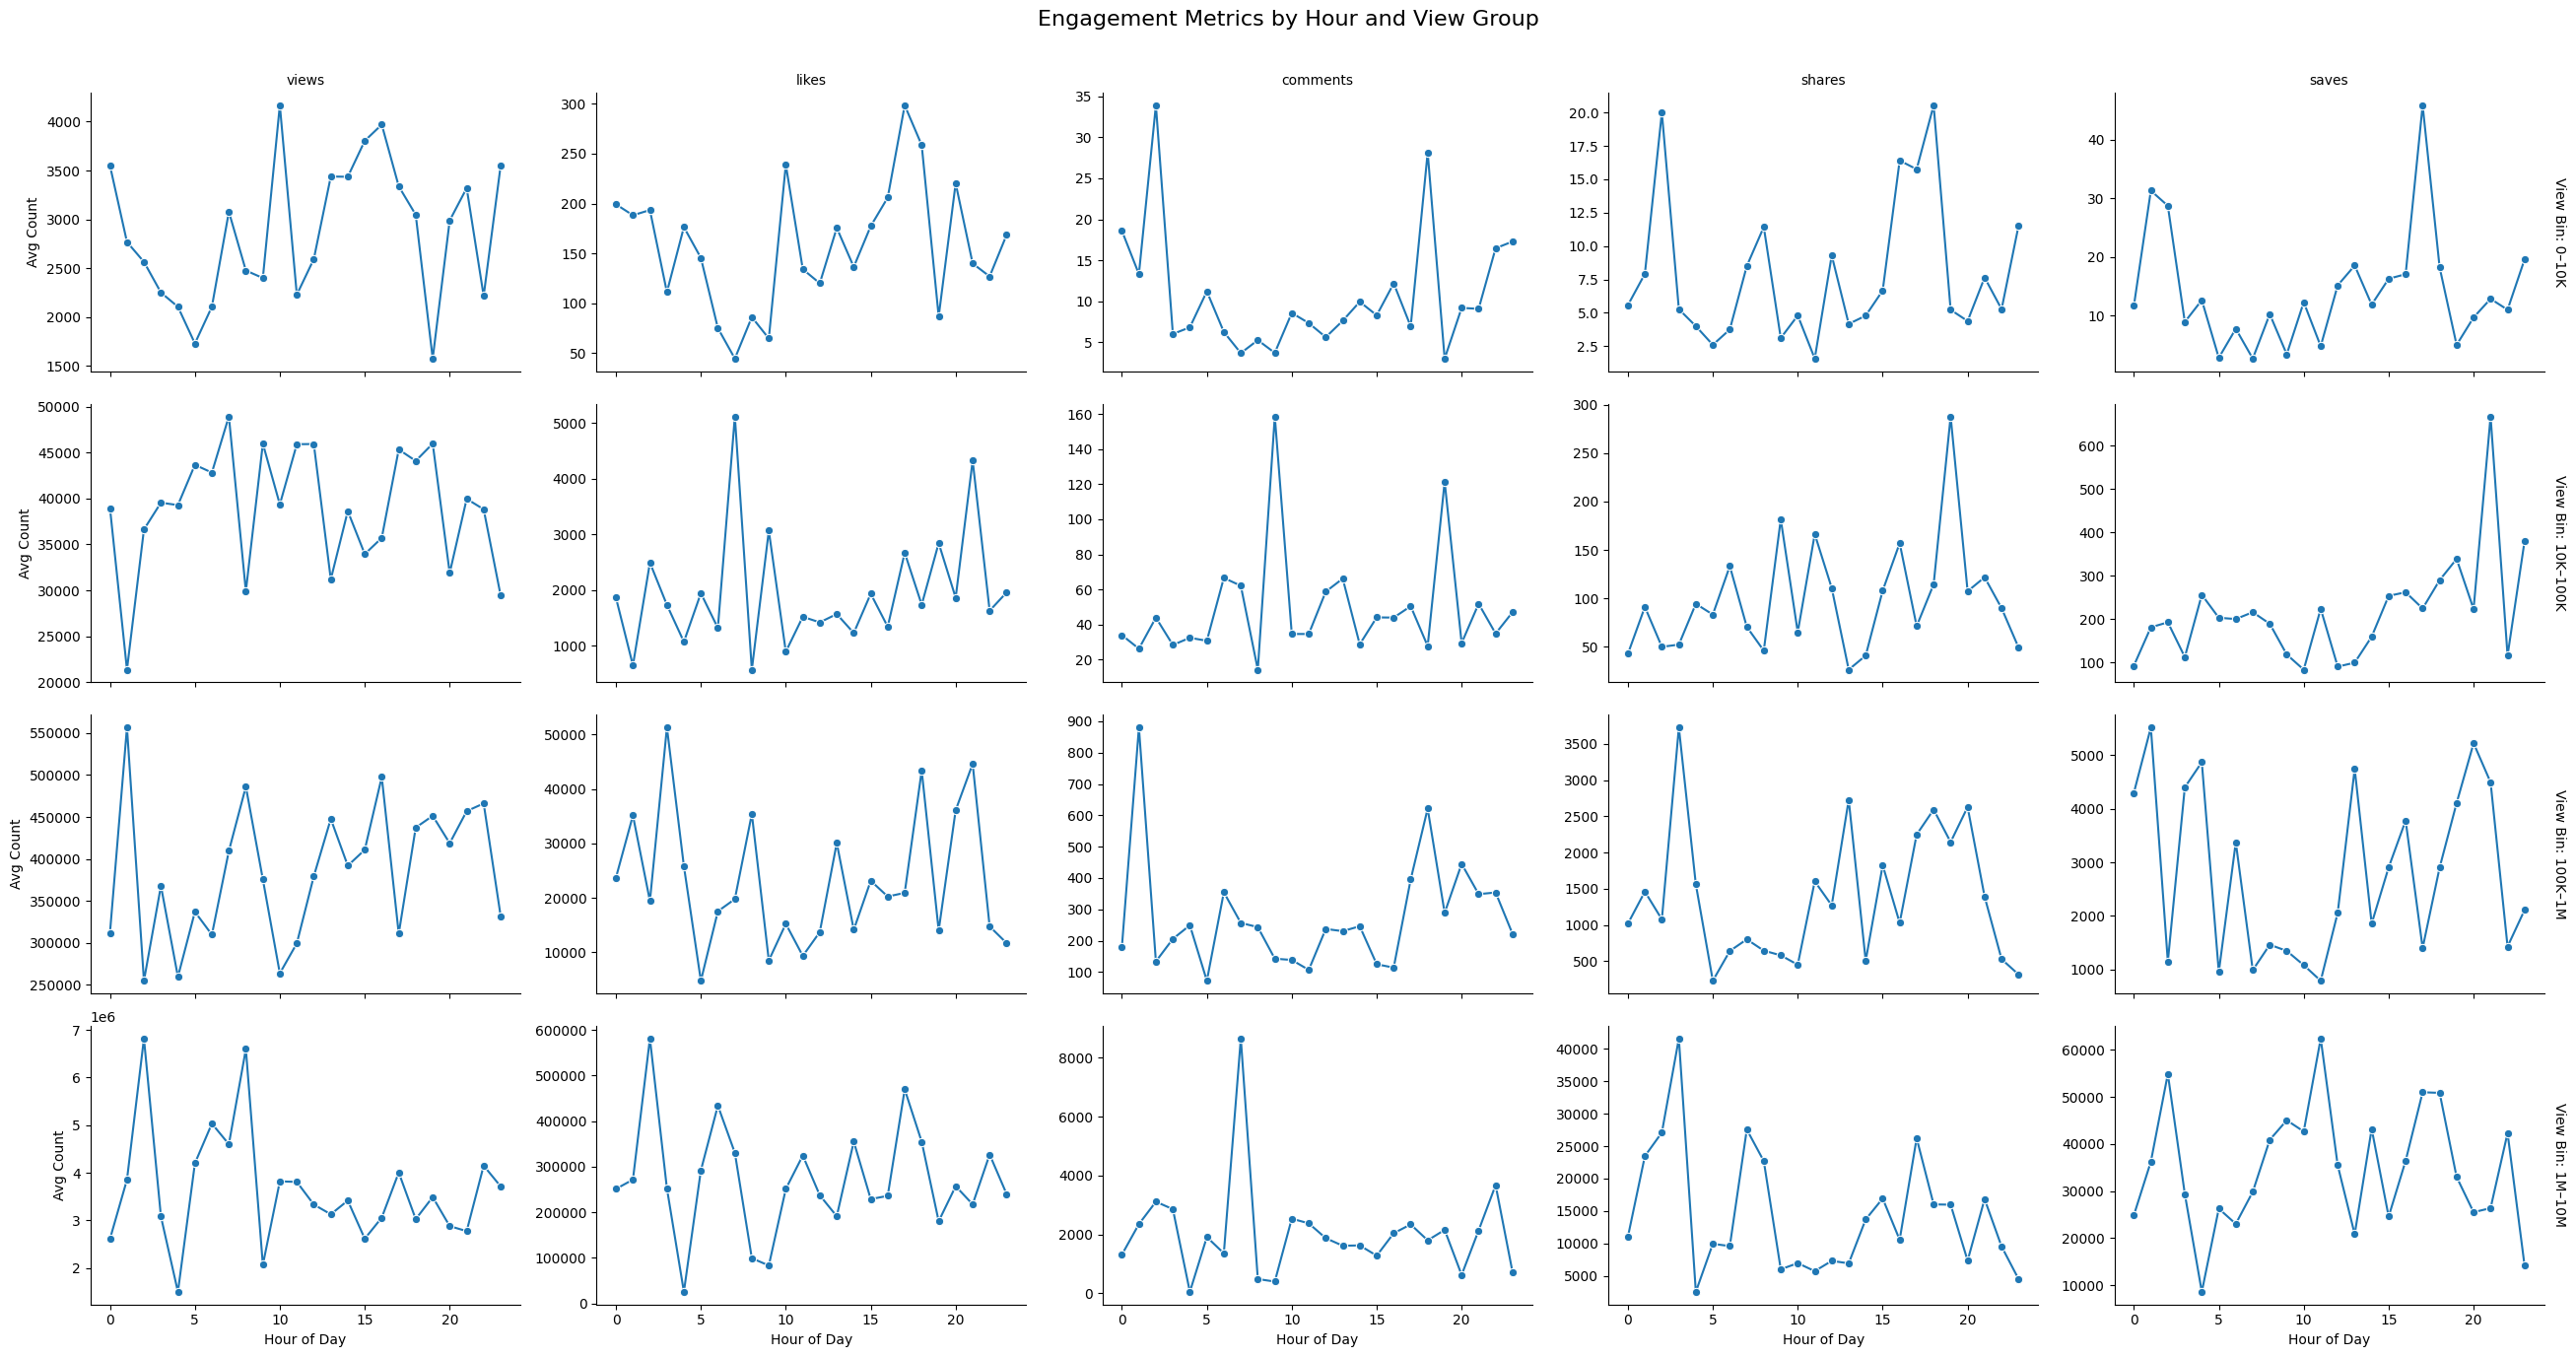

In [89]:
hourly_melted = hourly_grouped.melt(
    id_vars=['view_group', 'hour'],
    value_vars=['views', 'likes', 'comments', 'shares', 'saves'],
    var_name='metric',
    value_name='average_count'
)

g = sns.relplot(
    data=hourly_melted,
    x='hour',
    y='average_count',
    col='metric',
    row='view_group',
    kind='line',
    marker='o',
    facet_kws={'margin_titles': True, 'sharey': False},  
    height=3.5,
    aspect=1.5
)


g.set_axis_labels("Hour of Day", "Avg Count")
g.set_titles(row_template='View Bin: {row_name}', col_template='{col_name}')
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Engagement Metrics by Hour and View Group", fontsize=16)

plt.show()



### Analysis of Day Posted on TikTok engagament data

In [91]:
day_posted_df = dataset[["date", "views", "likes", "comments", "shares", "saves"]]

In [92]:
day_posted_df.head()

,date,views,likes,comments,shares,saves
0,2025-01-26,588,94,11,1.0,3
1,2025-01-25,1011,99,1,NaN,1
2,2023-07-21,8115,59,10,10.0,12
3,2024-12-02,3400000,374800,514,4391.0,41612
4,2024-12-10,701100,15500,118,344.0,1293


In [94]:
day_posted_df = day_posted_df.copy()

day_posted_df['date'] = pd.to_datetime(day_posted_df['date']) 
day_posted_df['day_of_week'] = day_posted_df['date'].dt.day_name()

In [96]:
day_posted_df.head()

,date,views,likes,comments,shares,saves,day_of_week
0,2025-01-26,588,94,11,1.0,3,Sunday
1,2025-01-25,1011,99,1,NaN,1,Saturday
2,2023-07-21,8115,59,10,10.0,12,Friday
3,2024-12-02,3400000,374800,514,4391.0,41612,Monday
4,2024-12-10,701100,15500,118,344.0,1293,Tuesday


In [97]:
day_posted_df['weekday_number'] = day_posted_df['date'].dt.weekday

In [106]:
corr_matrix2 = day_posted_df.corr(numeric_only=True)

print(corr_matrix2 * 100)

                     views       likes    comments      shares       saves  \
views           100.000000   83.990885   75.736269   50.624145   60.249207   
likes            83.990885  100.000000   75.716952   61.100393   73.828008   
comments         75.736269   75.716952  100.000000   51.113613   50.183496   
shares           50.624145   61.100393   51.113613  100.000000   60.198273   
saves            60.249207   73.828008   50.183496   60.198273  100.000000   
weekday_number   -4.474960   -3.119922   -1.151004   -6.683215   -5.065613   

                weekday_number  
views                -4.474960  
likes                -3.119922  
comments             -1.151004  
shares               -6.683215  
saves                -5.065613  
weekday_number      100.000000  


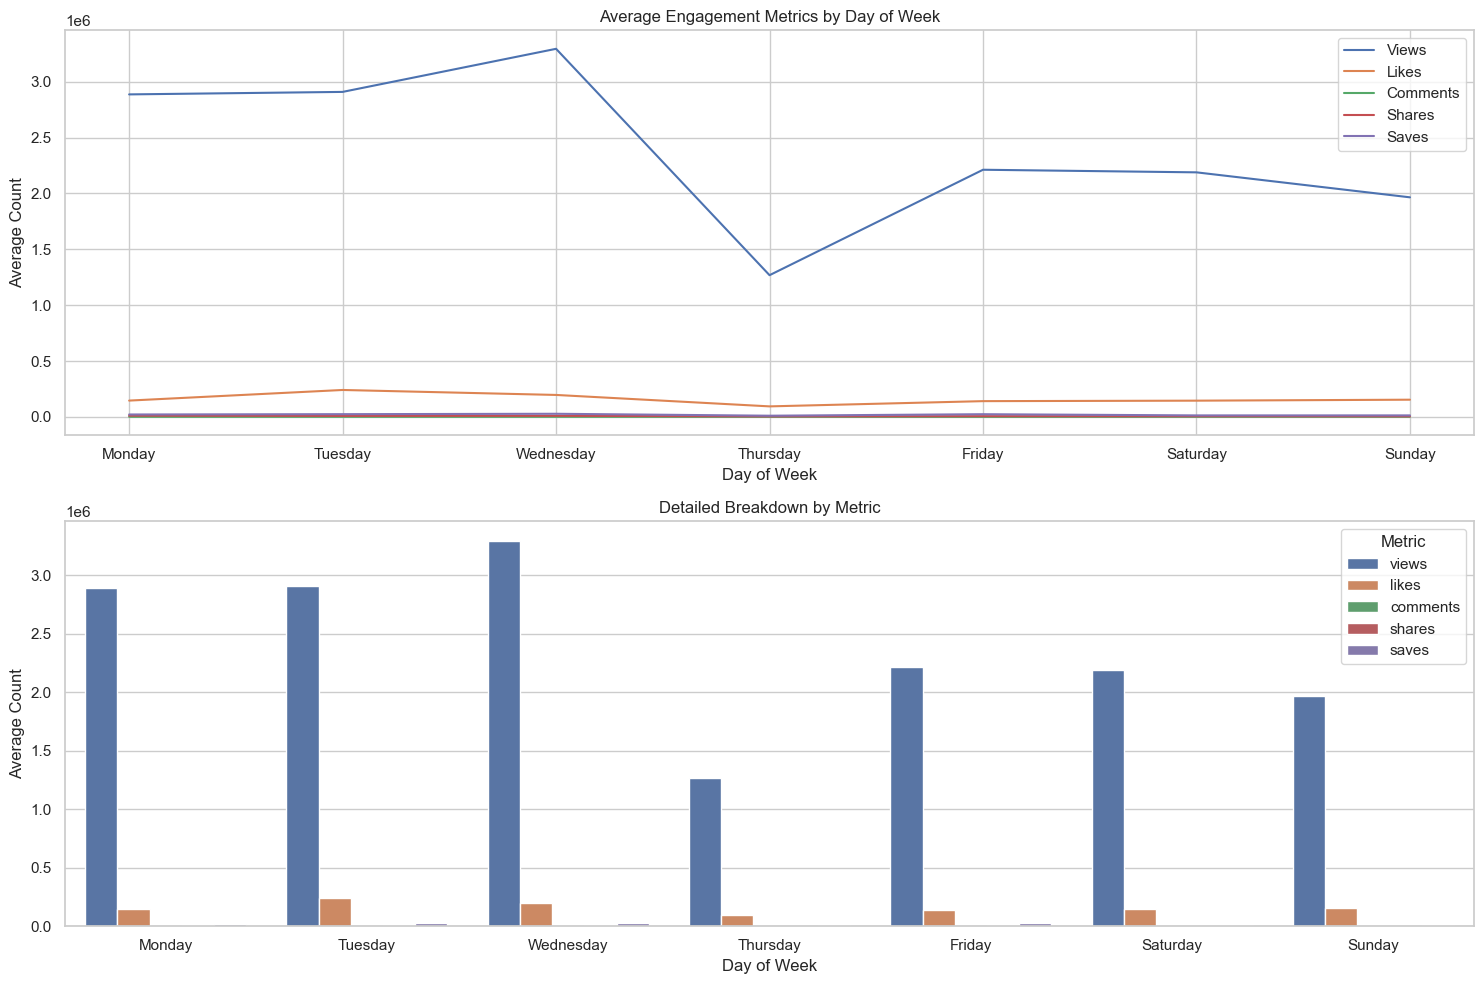

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_posted_df['day_of_week'] = pd.Categorical(day_posted_df['day_of_week'], categories=day_order, ordered=True)

engagement_by_day = day_posted_df.groupby('day_of_week')[
    ["views", "likes", "comments", "shares", "saves"]
].mean().reset_index()


sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
for metric in ["views", "likes", "comments", "shares", "saves"]:
    sns.lineplot(data=engagement_by_day, x='day_of_week', y=metric, label=metric.replace('_count', '').title())
plt.title('Average Engagement Metrics by Day of Week')
plt.ylabel('Average Count')
plt.xlabel('Day of Week')
plt.legend()

plt.subplot(2, 1, 2)
engagement_melted = engagement_by_day.melt(id_vars='day_of_week', 
                                         value_vars=["views", "likes", "comments", "shares", "saves"],
                                         var_name='metric', value_name='average_count')
sns.barplot(data=engagement_melted, x='day_of_week', y='average_count', hue='metric')
plt.title('Detailed Breakdown by Metric')
plt.ylabel('Average Count')
plt.xlabel('Day of Week')
plt.legend(title='Metric')

plt.tight_layout()
plt.show()

### Advanced Analysis of Day posted on User Engagement Data

In [109]:
bins = [0, 10_000, 100_000, 1_000_000, 10_000_000]
labels = ['0–10K', '10K–100K', '100K–1M', '1M–10M']

day_posted_df = day_posted_df.copy()
day_posted_df['view_group'] = pd.cut(day_posted_df['views'], bins=bins, labels=labels)


In [110]:
engagement_by_day_bin = day_posted_df.groupby(['view_group', 'day_of_week'])[
    ["views", "likes", "comments", "shares", "saves"]
].mean().reset_index()


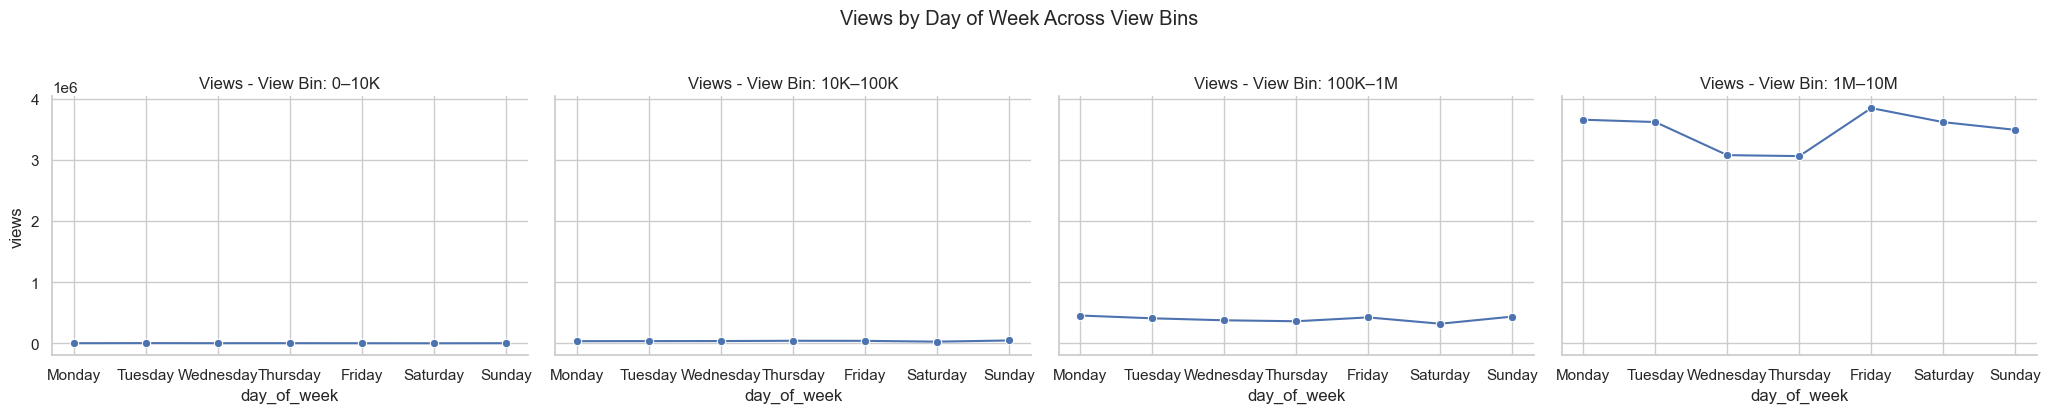

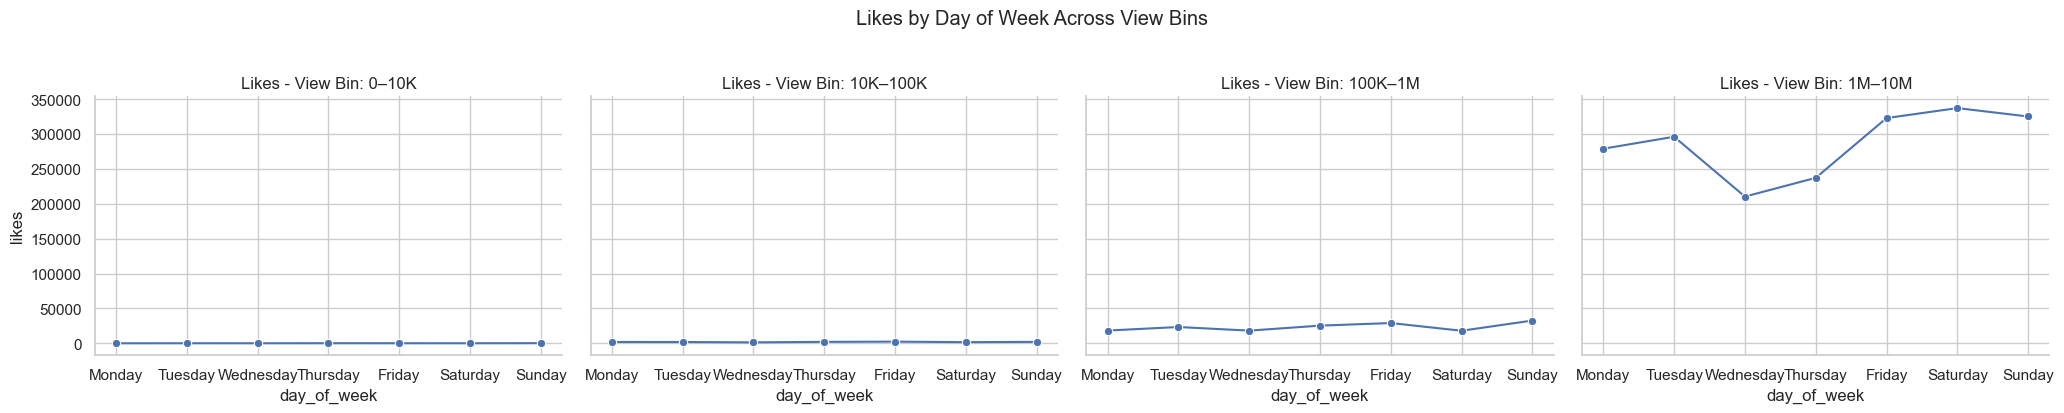

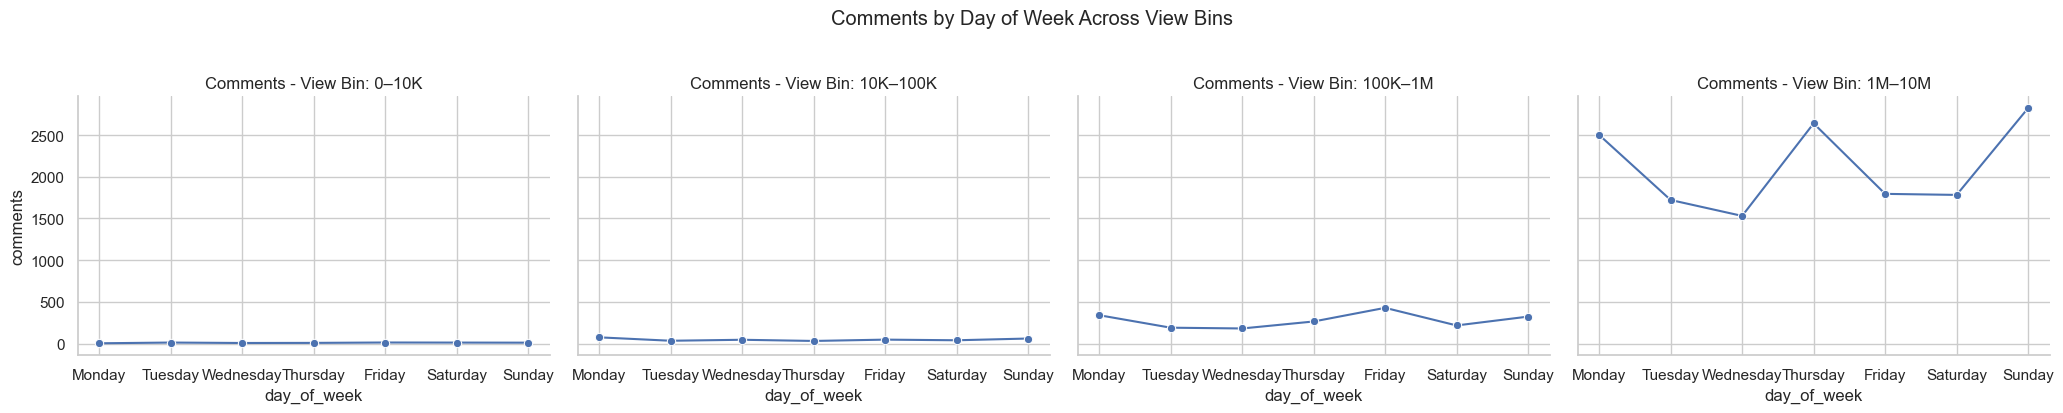

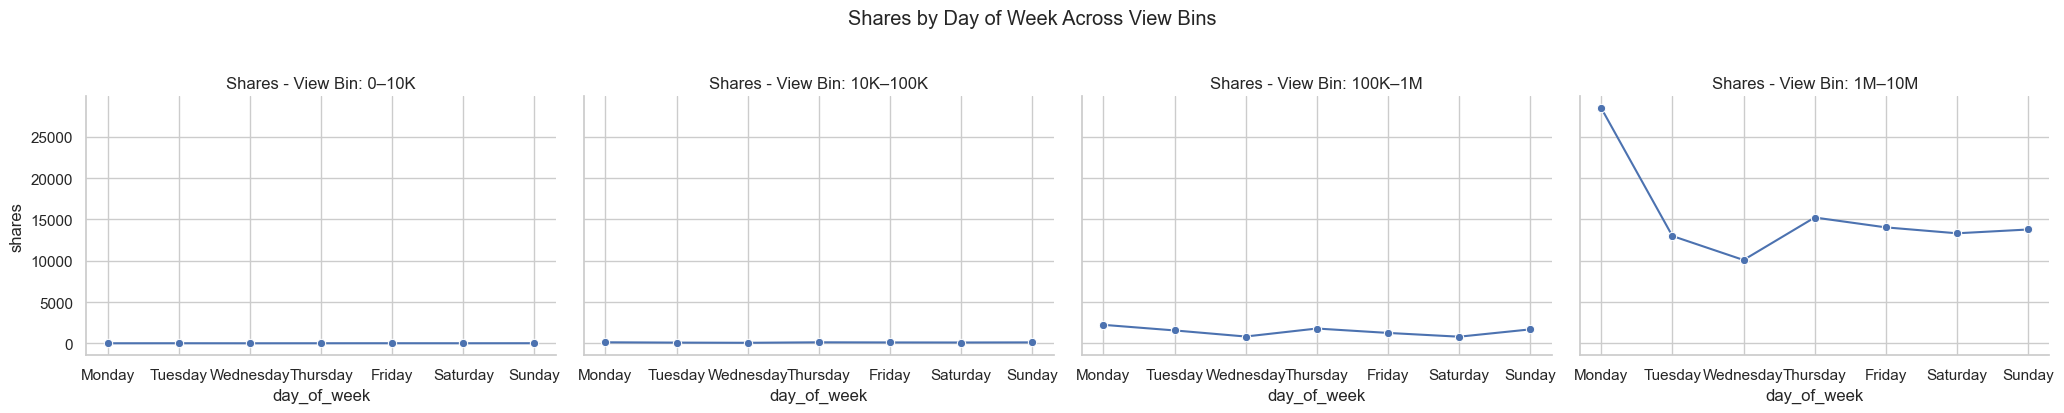

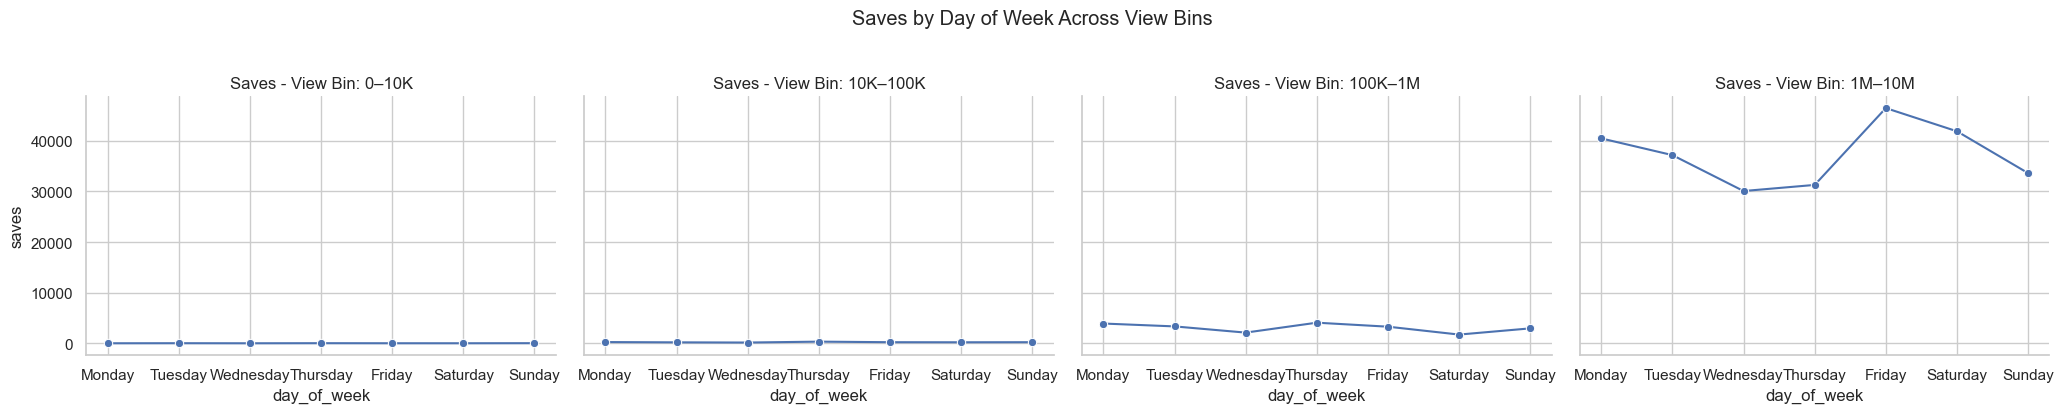

In [111]:
metrics = ["views", "likes", "comments", "shares", "saves"]
for metric in metrics:
    g = sns.relplot(
        data=engagement_by_day_bin,
        x='day_of_week',
        y=metric,
        col='view_group',
        kind='line',
        marker='o',
        height=4,
        aspect=1.3
    )
    g.set_titles(f"{metric.title()} - View Bin: {{col_name}}")
    g.fig.suptitle(f"{metric.title()} by Day of Week Across View Bins", y=1.03)
    plt.tight_layout()
    plt.show()


### Analysis of Hashtags on User Engagement Data

In [115]:
hashtags_df = dataset[["hashtags", "views", "likes", "comments", "shares", "saves"]]

In [116]:
hashtags_df.head()

,hashtags,views,likes,comments,shares,saves
0,"[""swifttok"",""reputationtvcountdown"",""reputatio...",588,94,11,1.0,3
1,"[""duet"",""womenshealth""]",1011,99,1,NaN,1
2,"[""roofinglife"",""nigeria"",""roofing"",""stonecoated""]",8115,59,10,10.0,12
3,"[""grwm"",""makeup""]",3400000,374800,514,4391.0,41612
4,"[""detattas"",""detattasdeserie"",""moneyfesting"",""...",701100,15500,118,344.0,1293


Your columns are: ['hashtags', 'views', 'likes', 'comments', 'shares', 'saves']

Sample raw hashtags before processing:
0    ["swifttok","reputationtvcountdown","reputatio...
1                              ["duet","womenshealth"]
2    ["roofinglife","nigeria","roofing","stonecoated"]
3                                    ["grwm","makeup"]
4    ["detattas","detattasdeserie","moneyfesting","...
Name: hashtags, dtype: object

Sample cleaned hashtags after processing:
0                         "swifttok"
0            "reputationtvcountdown"
0         "reputationtaylorsversion"
0                     "reputationtv"
1                             "duet"
                   ...              
130                         "上热门🔥🔥🔥"
130    "上热门一千万粉丝＃上热门900000000亿流量第一名"
131                         "coffee"
131                      "nespresso"
131                   "creatistapro"
Name: hashtags, Length: 1000, dtype: object

Hashtag engagement data preview:
      hashtags       views      likes  comments

C:\Users\ezana\AppData\Local\Temp\ipykernel_23240\953572405.py:95: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ezana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


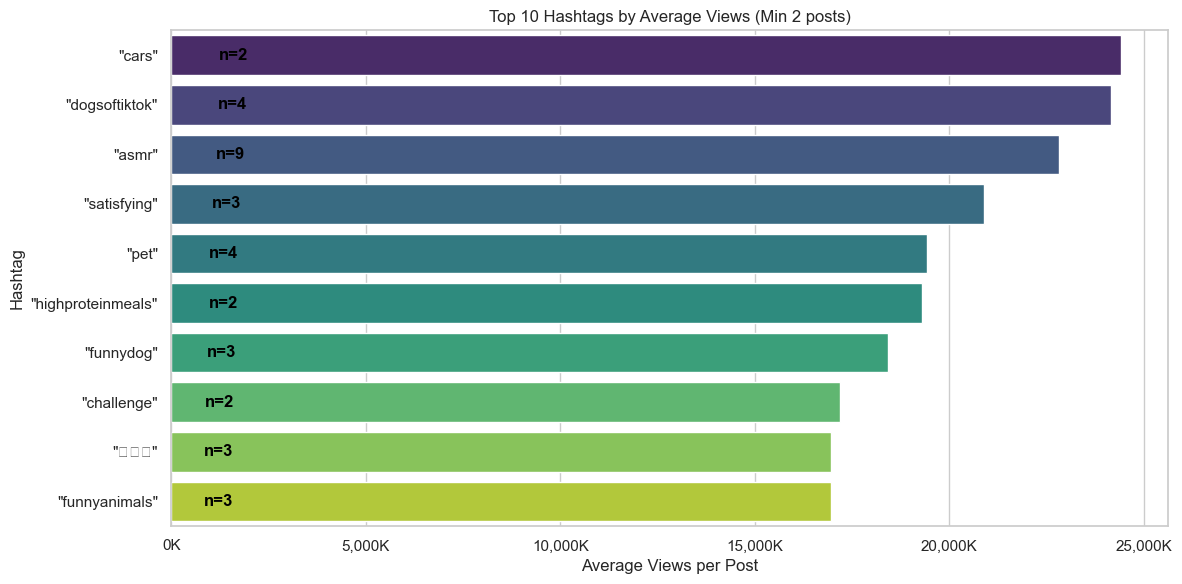

In [117]:
print("Your columns are:", hashtags_df.columns.tolist())

hashtags_df = hashtags_df.copy()

print("\nSample raw hashtags before processing:")
print(hashtags_df['hashtags'].head())

def clean_hashtags(hashtags):
    if pd.api.types.is_scalar(hashtags):
        if pd.isna(hashtags):
            return []
        if isinstance(hashtags, str):
            clean_str = hashtags.replace('[', '').replace(']', '')
            return [
                tag.strip().lower().replace('#', '')
                for tag in clean_str.split(',')
                if tag.strip() != ''
            ]
        clean_str = str(hashtags).replace('[', '').replace(']', '')
        return [clean_str.strip().lower().replace('#', '')]
    
    if isinstance(hashtags, (list, np.ndarray)):
        return [
            str(tag).replace('[', '').replace(']', '').strip().lower().replace('#', '')
            for tag in hashtags
            if pd.notna(tag) and str(tag).strip() != ''
        ]
    
    return []

hashtags_df['hashtags'] = [clean_hashtags(x) for x in hashtags_df['hashtags']]

exploded_df = hashtags_df.explode('hashtags')

exploded_df = exploded_df[exploded_df['hashtags'].notna() & (exploded_df['hashtags'] != '')]

print("\nSample cleaned hashtags after processing:")
print(exploded_df['hashtags'].head(1000))

available_metrics = ['views', 'likes', 'comments', 'shares', 'saves']
existing_metrics = [col for col in available_metrics if col in exploded_df.columns]

hashtag_counts = exploded_df['hashtags'].value_counts()
MIN_OCCURRENCES = 2
common_hashtags = hashtag_counts[hashtag_counts >= MIN_OCCURRENCES].index

agg_dict = {metric: 'mean' for metric in existing_metrics}
agg_dict['hashtags'] = 'count'  
hashtag_engagement = (
    exploded_df[exploded_df['hashtags'].isin(common_hashtags)]
    .groupby('hashtags')
    .agg(agg_dict)
    .rename(columns={'hashtags': 'post_count'})
    .reset_index()
)

print("\nHashtag engagement data preview:")
print(hashtag_engagement.head())

if len(hashtag_engagement) > 0 and 'views' in existing_metrics:
    sort_by = 'views'
    
    top_hashtags = (
        hashtag_engagement
        .sort_values(sort_by, ascending=False)
        .head(10)
    )
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_hashtags,
        x=sort_by,
        y='hashtags',
        palette='viridis',
        order=top_hashtags.sort_values(sort_by, ascending=False)['hashtags']
    )
    
    plt.title(f'Top 10 Hashtags by Average Views (Min {MIN_OCCURRENCES} posts)')
    plt.xlabel('Average Views per Post')
    plt.ylabel('Hashtag')
    
    ax = plt.gca()
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1000))))
    
    for i, (_, row) in enumerate(top_hashtags.iterrows()):
        plt.text(
            x=row[sort_by] * 0.05, 
            y=i,
            s=f"n={row['post_count']}",
            va='center',
            color='black',
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()
else:
    print("\nError: No data to plot or 'views' column not found.")
    print("Available metrics are:", existing_metrics)
    print("Number of hashtags meeting minimum occurrence:", len(hashtag_engagement))
    if len(hashtag_engagement) > 0:
        print("Hashtag engagement dataframe sample:")
        print(hashtag_engagement.head())

C:\Users\ezana\AppData\Local\Temp\ipykernel_23240\3160834451.py:31: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ezana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


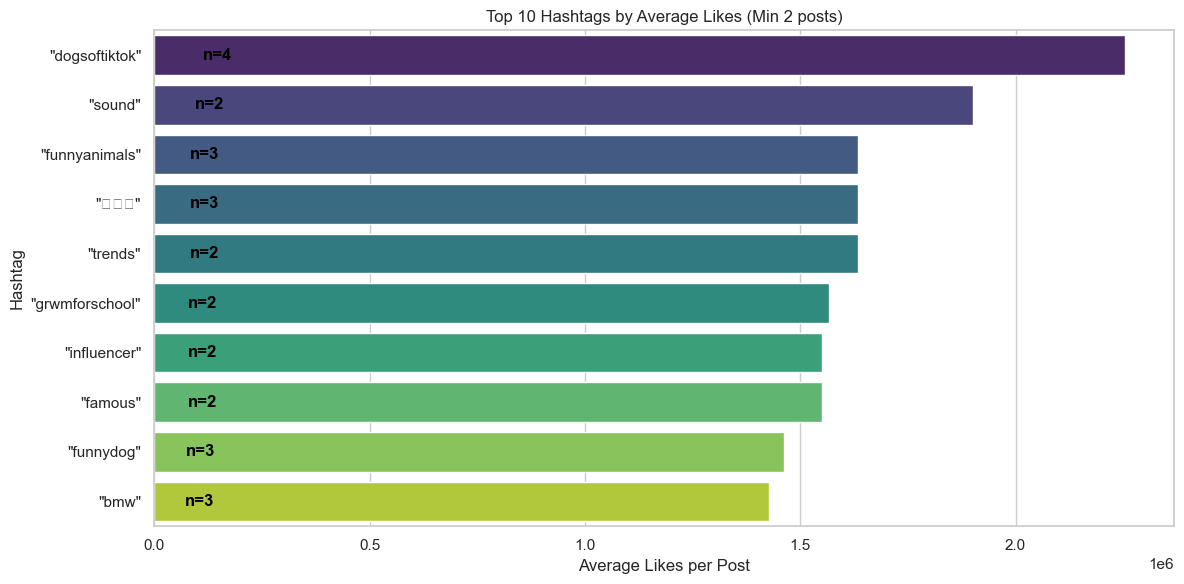

In [118]:
sort_by = 'likes' if 'likes' in existing_metrics else existing_metrics[0]
top_hashtags = (
    hashtag_engagement
    .sort_values(sort_by, ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_hashtags,
    x=sort_by,
    y='hashtags',
    palette='viridis',
    order=top_hashtags.sort_values(sort_by, ascending=False)['hashtags']
)

plt.title(f'Top 10 Hashtags by Average {sort_by.capitalize()} (Min {MIN_OCCURRENCES} posts)')
plt.xlabel(f'Average {sort_by.capitalize()} per Post')
plt.ylabel('Hashtag')

for i, (_, row) in enumerate(top_hashtags.iterrows()):
    plt.text(
        x=row[sort_by] * 0.05,  
        y=i,
        s=f"n={row['post_count']}",
        va='center',
        color='black',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

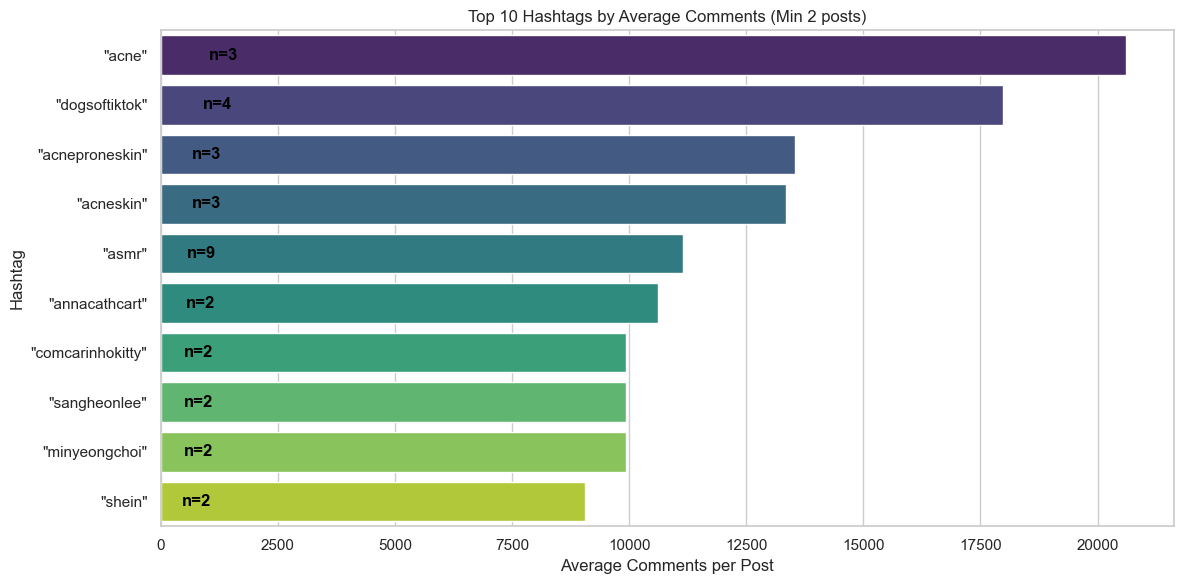

In [119]:
if 'comments' in existing_metrics:
    sort_by = 'comments'
    top_hashtags = (
        hashtag_engagement
        .sort_values(sort_by, ascending=False)
        .head(10)
    )
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_hashtags,
        x=sort_by,
        y='hashtags',
        palette='viridis',
        order=top_hashtags.sort_values(sort_by, ascending=False)['hashtags']
    )
    
    plt.title(f'Top 10 Hashtags by Average Comments (Min {MIN_OCCURRENCES} posts)')
    plt.xlabel('Average Comments per Post')
    plt.ylabel('Hashtag')
    
    for i, (_, row) in enumerate(top_hashtags.iterrows()):
        plt.text(
            x=row[sort_by] * 0.05,  
            y=i,
            s=f"n={row['post_count']}",
            va='center',
            color='black',
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'comments' column not found in your data. Available metrics are:", existing_metrics)

C:\Users\ezana\AppData\Local\Temp\ipykernel_23240\2844014216.py:32: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ezana\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129315 (\N{ROLLING ON THE FLOOR LAUGHING}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


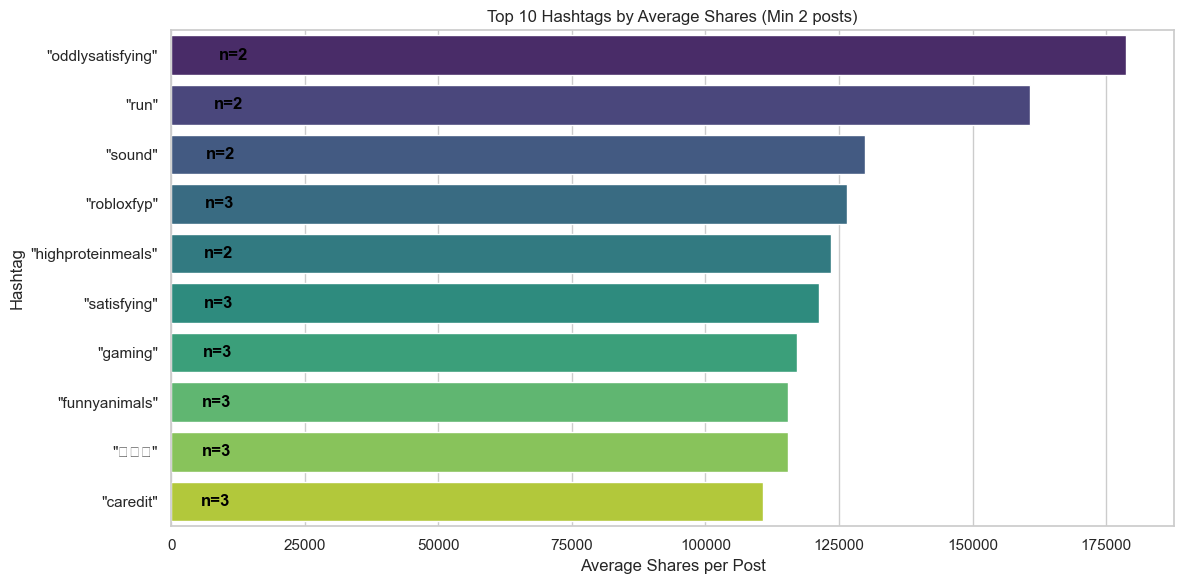

In [120]:
if 'shares' in existing_metrics:
    sort_by = 'shares'
    top_hashtags = (
        hashtag_engagement
        .sort_values(sort_by, ascending=False)
        .head(10)
    )
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_hashtags,
        x=sort_by,
        y='hashtags',
        palette='viridis',
        order=top_hashtags.sort_values(sort_by, ascending=False)['hashtags']
    )
    
    plt.title(f'Top 10 Hashtags by Average Shares (Min {MIN_OCCURRENCES} posts)')
    plt.xlabel('Average Shares per Post')
    plt.ylabel('Hashtag')
    
    for i, (_, row) in enumerate(top_hashtags.iterrows()):
        plt.text(
            x=row[sort_by] * 0.05,  
            y=i,
            s=f"n={row['post_count']}",
            va='center',
            color='black',
            fontweight='bold'
        )
    
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'shares' column not found in your data. Available metrics are:", existing_metrics)

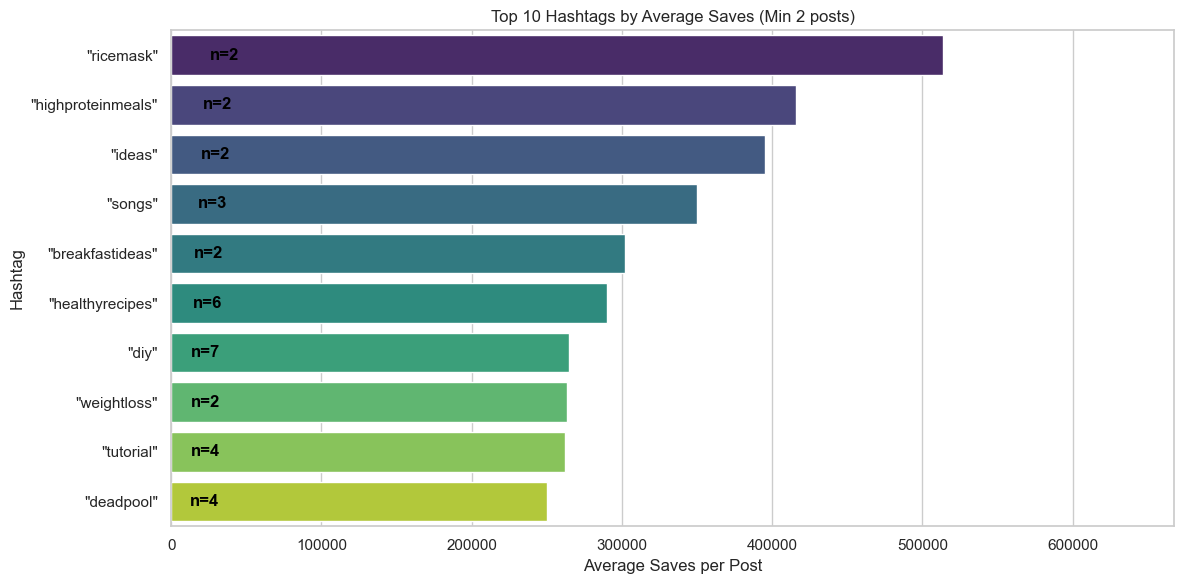

In [121]:
if 'saves' in existing_metrics:
    sort_by = 'saves'
    top_hashtags = (
        hashtag_engagement
        .sort_values(sort_by, ascending=False)
        .head(10)
    )
    
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_hashtags,
        x=sort_by,
        y='hashtags',
        palette='viridis',
        order=top_hashtags.sort_values(sort_by, ascending=False)['hashtags']
    )
    
    plt.title(f'Top 10 Hashtags by Average Saves (Min {MIN_OCCURRENCES} posts)')
    plt.xlabel('Average Saves per Post')
    plt.ylabel('Hashtag')
    
    for i, (_, row) in enumerate(top_hashtags.iterrows()):
        plt.text(
            x=row[sort_by] * 0.05,  
            y=i,
            s=f"n={row['post_count']}",
            va='center',
            color='black',
            fontweight='bold'
        )
        
    max_value = top_hashtags[sort_by].max()
    plt.xlim(0, max_value * 1.3)  
    
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'saves' column not found in your data. Available metrics are:", existing_metrics)